# Machine Learning Basics

Subu Sangameswar

May 2020


In [1]:
# Load libraries
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

# https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_naive_bayes.htm

In [2]:
# Load dataset
data = load_breast_cancer()

In [3]:
# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [4]:
# Look at our data
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [5]:
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

In [7]:
# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

In [8]:
# Make predictions
preds = gnb.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


In [15]:
# the NB classifier is 94.15% accurate. 
# This means that 94.15 percent of the time the classifier is able to make the correct prediction 
# as to whether or not the tumor is malignant or benign

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.9414893617021277


In [10]:
# Split-out validation dataset
#array = dataset.values
#X = array[:,0:4]
#y = array[:,4]
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=2, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
#train, test, train_labels, test_labels
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10)   # removed the parametere - random_state=1
	cv_results = cross_val_score(model, train, train_labels, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.944804 (0.041573)
LDA: 0.955331 (0.026495)
KNN: 0.908030 (0.042965)
CART: 0.921120 (0.033394)
NB: 0.936977 (0.042793)
SVM: 0.619433 (0.012479)


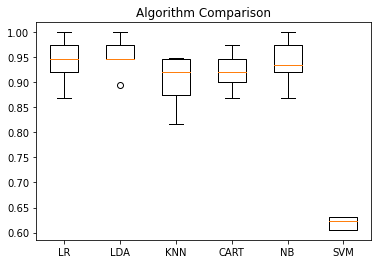

In [11]:
# compare algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(train, train_labels)
predictions = model.predict(test)
# Evaluate predictions
# f1-score and support are the measures to watch
print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

0.6436170212765957
[[  0  67]
 [  0 121]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.64      1.00      0.78       121

    accuracy                           0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188



/Users/sangames/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support vector machines (SVMs)
powerful yet flexible supervised machine learning methods used for classification, regression, and, outliers’ detection

In [17]:

SVCClf = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVCClf.fit(train, train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [18]:
SVCClf.coef_

array([[ 1.37051799e+00,  2.58882286e-01, -2.77048090e-01,
         1.40554794e-03, -2.03860714e-01, -2.78008805e-01,
        -6.50934120e-01, -3.66960800e-01, -3.58279185e-01,
        -5.02756474e-02, -1.60347399e-01,  1.86949497e+00,
         5.54378323e-01, -1.25971068e-01, -2.67569630e-02,
         3.95962098e-02, -1.09466675e-02, -3.23546503e-02,
        -6.92642012e-02,  7.58034086e-03, -2.83417137e-01,
        -4.39599882e-01,  3.28388436e-03,  4.04233376e-03,
        -4.08415749e-01, -8.74949084e-01, -1.60349407e+00,
        -5.95163098e-01, -1.32929236e+00, -1.47470529e-01]])

In [19]:
SVCClf.fit_status_

0

In [20]:
SVCClf.classes_

array([0, 1])

# Decision Tree Classifier

In [21]:
# train, test, train_labels, test_labels
clf = DecisionTreeClassifier()
clf = clf.fit(train,train_labels)

In [22]:
y_pred = clf.predict(test)

In [24]:
result = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_labels, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_labels,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 60   7]
 [ 16 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        67
           1       0.94      0.87      0.90       121

    accuracy                           0.88       188
   macro avg       0.86      0.88      0.87       188
weighted avg       0.88      0.88      0.88       188

Accuracy: 0.8776595744680851
